# RCC Specific Cohort Characteristics 

Author: Olatomiwa Bifarin<br>
Department of Biochemistry and Molecular Biology<br>
University of Georgia<br>
Edison Lab<br>

Last edited: 10FEB2020

_This is a static version of a Jupyter notebook, and work (documentation) is still in progress_ 
 
### Notebook Outline

1. [Background](#1)
2. [Functions](#2)
3. [Load Data](#3)
4. [Missing RCC Data](#4)
5. [RCC Meta-Data Plots](#5)


In [1]:
#import python packages and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

#For Seaborn plots
import seaborn as sns; sns.set(style='white')

#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk')

## 1. Background
<a id="1"></a>

In this notebook, meta-data distinct to RCC will be analyzed. This include: 
    - Metastasis
    - Histological Subtypes
    - Nuclear Grade
    - TNM Staging
    - Stage of RCC
    - Tumor Width

## 2. Functions
<a id="2"></a>

___Piechart function___

In [2]:
def pieChart(dataframe, tilt_num, explode=False, shadow=False): 
    '''
    DEPENDENCY: matplotlib.pyplot.pie
    
    INPUTS: 
    dataframe = A pandas dataframe with category in the first column and associated data in the second column
    tilt_num = A number that specifies the amount of offset to apply to the wedge corresponding to the dataset 
    on the last row. The purpose of this is to make pie-chart annotation visible in the case of an overlapping 
    annotation. For best results, choose number between 0 and 1.  
    
    explode = Boolean. Set to True to make the tilt_num parameters applicable. 
    
    shadow = Boolean. Set to True for wedge shadows
    
    OUTPUTS: A pie chart figure. 
    
    '''
    if explode==False: 
        plt.pie(
        # using data
        dataframe.iloc[:, 1],
        # labels
        labels=dataframe.iloc[:, 0],
        # with no shadows
        shadow=shadow,
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.show()
        return fig
    else:
        lst = [0] * dataframe.shape[0] # create a list of length equal to number of pie, sets to zero
        lst[-1] = tilt_num # replace the last digit of lst with the tilt_num
        plt.pie(dataframe.iloc[:, 1], labels=dataframe.iloc[:, 0],
        shadow=shadow, explode=lst, startangle=90, autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.show()
    return fig

## 3. Load Data
<a id="3"></a>

In [3]:
RCCdataframe = pd.read_excel('data/RCCdataframe.xlsx')

## 4. Missing Data
<a id="4"></a>

In [4]:
RCCmetadata = RCCdataframe.filter(['Sample_ID', 'Collection', 'Gender', 'Race', 'Height', 'Weight', 'BMI',
       'Smoker', 'Age', 'Metastatic', 'SubTypes', 'Nuclear Grade', 'Tstage',
       'Nstage', 'Mstage', 'Stage', 'Tumor Width', 'Groups', '3Groups'])
print(RCCmetadata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 15 columns):
Collection       82 non-null object
Gender           81 non-null object
Race             81 non-null object
BMI              82 non-null float64
Smoker           82 non-null object
Age              82 non-null float64
Metastatic       82 non-null object
SubTypes         82 non-null object
Nuclear Grade    78 non-null float64
Tstage           79 non-null object
Nstage           80 non-null object
Mstage           74 non-null object
Stage            70 non-null float64
Tumor Width      80 non-null float64
Groups           82 non-null object
dtypes: float64(5), object(10)
memory usage: 10.2+ KB
None


In [5]:
print ('Number of missing values in metastatic is', 
       RCCdataframe['Metastatic'].isna().sum())
print ('Number of missing values in subtypes is', 
       RCCdataframe['SubTypes'].isna().sum())
print ('Number of missing values in nuclear grade is', 
       RCCdataframe['Nuclear Grade'].isna().sum())
print ('Number of missing values in T stage is', 
       RCCdataframe['Tstage'].isna().sum())
print ('Number of missing values in N stage is', 
       RCCdataframe['Nstage'].isna().sum())
print ('Number of missing values in M stage is', 
       RCCdataframe['Mstage'].isna().sum())
print ('Number of missing values in stage is', 
       RCCdataframe['Stage'].isna().sum())

Number of missing values in metastatic is 0
Number of missing values in subtypes is 0
Number of missing values in nuclear grade is 4
Number of missing values in T stage is 3
Number of missing values in N stage is 2
Number of missing values in M stage is 8
Number of missing values in stage is 12


_Cancer Stage_: Twelve individuals cancer stage is not reported due inconclusive TNM staging. 

**How Stages were determined**

https://emedicine.medscape.com/article/2006851-overview

Define features for RCC, numerical. 

In [6]:
df_features = RCCdataframe.drop(
    ['Groups', 'Collection', 'Sample ID', 'Metastatic', 
     'SubTypes','Nuclear Grade', 'Grade', 'Tstage', 
     'Tstage Group', 'Nstage', 'Mstage', 
     'Stage', 'Grouped Stage','Tumor Width','Gender', 
     'Race', 'BMI', 'Smoker', 'Age' ], axis=1)

## 5. RCC Meta-Data
<a id="5"></a>

- Collection Method 
- Metastatic RCC At The Time of Collection 
- Histological subtypes 
- Nuclear grades 
- TNM staging 
- Kidney cancer stage

***a. Collection Method***

Surgery: Urine collected at the time of surgery;
Ambulatory: Urine collected while the patient was ambulatory

In [7]:
RCCmetadata['Collection'].value_counts()

OR        51
Clinic    31
Name: Collection, dtype: int64

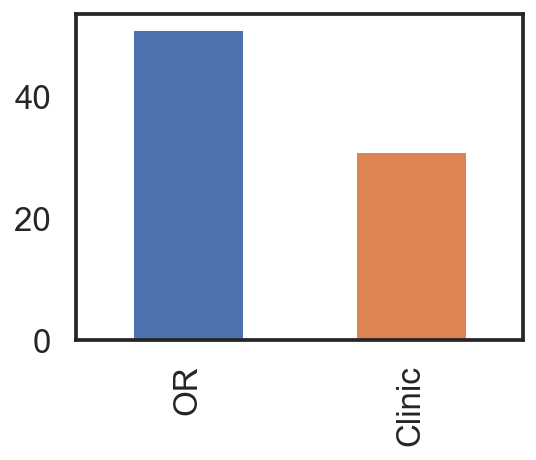

In [8]:
pd.value_counts(RCCmetadata['Collection']).plot.bar(figsize=(4,3));

***b. Metastasis***

In [10]:
RCCmetadata['Metastatic'].value_counts()

No     65
Yes    17
Name: Metastatic, dtype: int64

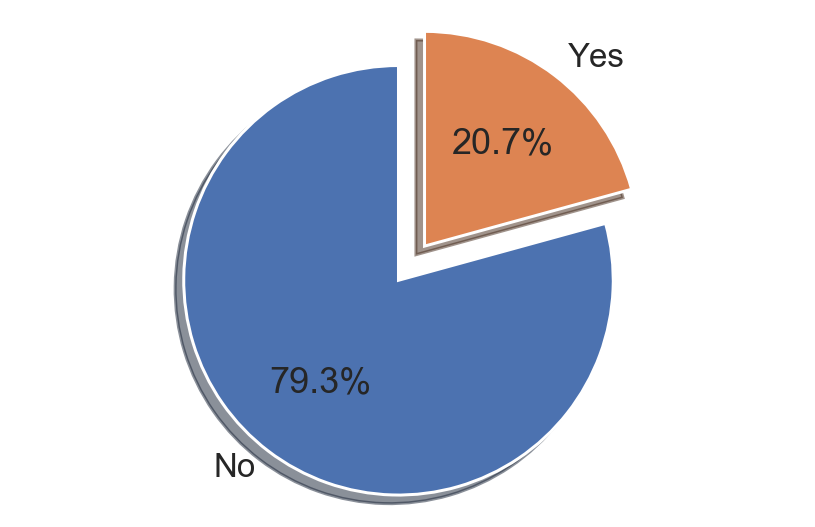

In [11]:
sns.set_context('talk')
raw_data = {'Metastatic': ['No', 'Yes'],
        'Numbers': [65, 17]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.2, explode=True, shadow = True)

***c. Histological Subtypes***

In [12]:
RCCmetadata['SubTypes'].value_counts()

Pure Clear Cell         57
Papillary               10
Clear Cell Papillary     6
Chromophobe              5
Unclassified             4
Name: SubTypes, dtype: int64

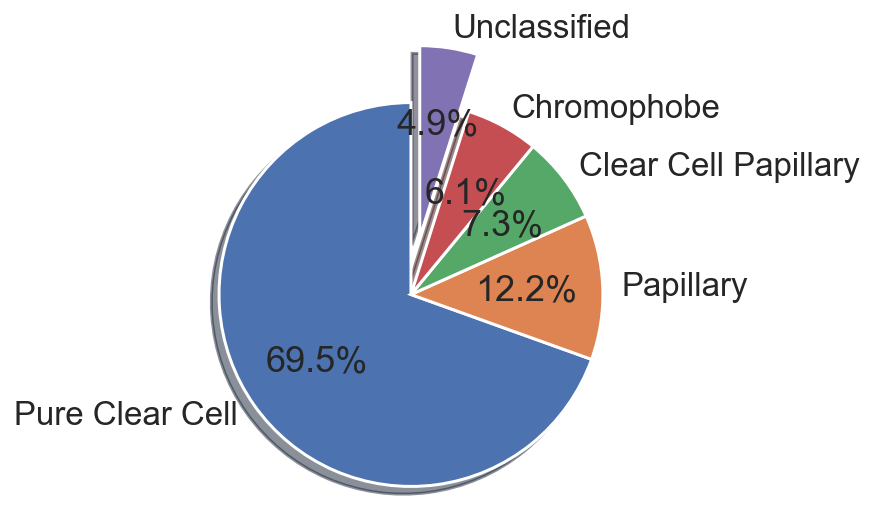

In [13]:
raw_data = {'Subtypes': ['Pure Clear Cell','Papillary', 'Clear Cell Papillary',
                         'Chromophobe', 'Unclassified'], 'Numbers': [57, 10, 6, 5, 4]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.3, explode=True, shadow = True)

***d. Nuclear Grade***

In [14]:
RCCmetadata['Nuclear Grade'].value_counts()

2.0    30
3.0    29
4.0    19
Name: Nuclear Grade, dtype: int64

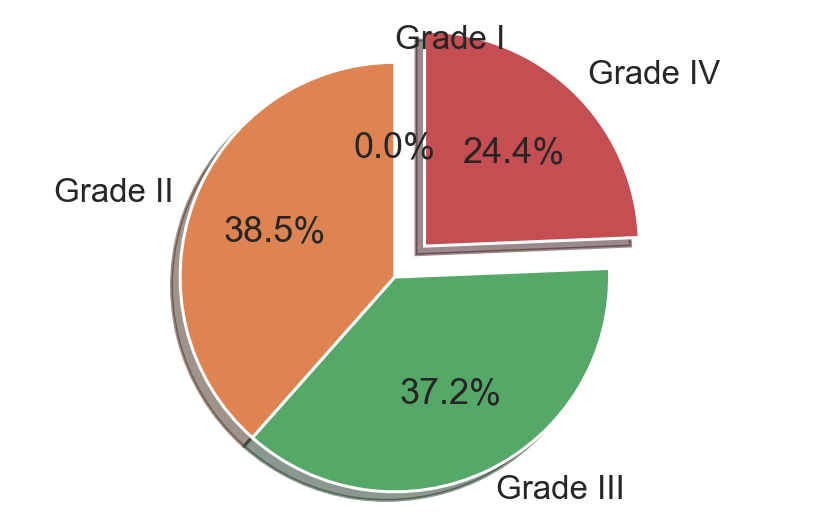

In [15]:
raw_data = {'Nuclear Grade': ['Grade I', 'Grade II', 'Grade III', 'Grade IV'], 
            'Numbers': [0, 30, 29, 19]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.2, explode=True, shadow = True)

***e. TNM Stages***

In [16]:
RCCdataframe['Tstage'].value_counts()

T1a    30
T3a    21
T1b    13
T2a     6
T2b     4
T3b     3
T4      2
Name: Tstage, dtype: int64

In [17]:
RCCdataframe['Mstage'].value_counts()

M0    60
M1    14
Name: Mstage, dtype: int64

In [18]:
RCCdataframe['Nstage'].value_counts()

N0    61
NX    10
N1     9
Name: Nstage, dtype: int64

***d. Kidney Cancer Stages***

In [19]:
RCCdataframe['Stage'].value_counts()

1.0    33
3.0    15
4.0    14
2.0     8
Name: Stage, dtype: int64

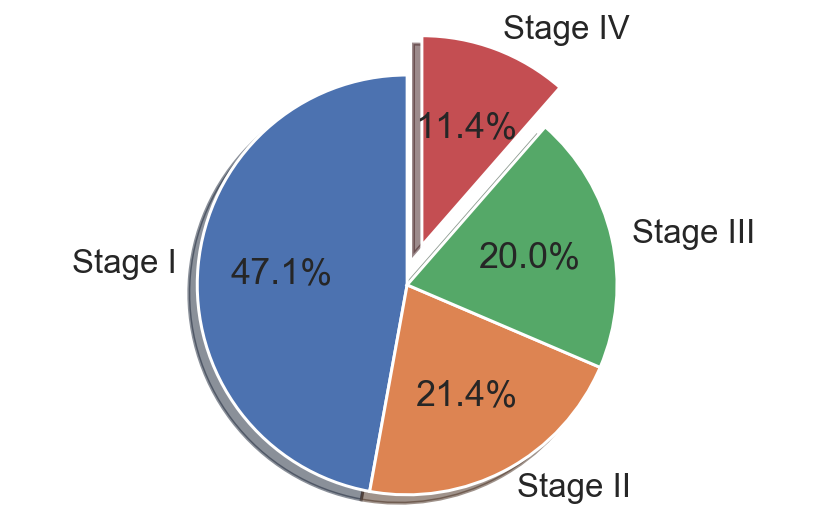

In [20]:
raw_data = {'Nuclear Grade': ['Stage I', 'Stage II', 'Stage III', 'Stage IV'], 
            'Numbers': [33, 15, 14, 8]}
data = pd.DataFrame(raw_data)
pieChart(data, 0.20, explode=True, shadow = True)

***e. Tumor Width***

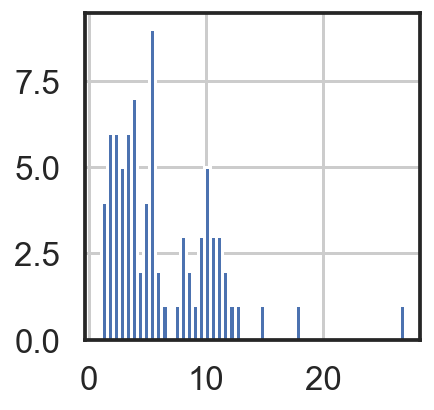

In [21]:
RCCdataframe['Tumor Width'].hist(figsize=(3, 3), bins=50);